好用工具：

* https://stackoverflow.com/questions/34702815/pandas-group-by-and-pivot-table-difference

注意事項：
* 如果畫圖出現中文亂碼：https://blog.csdn.net/fwj_ntu/article/details/105598145

# 套件

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
from scipy import stats

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [2]:
occupation_dict = {
    1: "營造／礦砂業",
    2: "製造業",
    3: "水電燃氣業",
    4: "批發／零售／貿易商",
    5: "旅宿／餐飲",
    6: "運輸倉儲",
    7: "農／林／漁／牧",
    8: "金融保險",
    9: "不動產／租賃",
    10: "軍／警／消",
    11: "公務人員",
    12: "律師／會計師／地政士",
    13: "醫藥服務",
    14: "休閒服務",
    15: "其他／家管",
    16: "自由業",
    17: "投資／自營商",
    18: "媒體文教",
    19: "學生",
    20: "學校教師（含行政人員）",
    21: "資訊科技",
    22: "公證人或記帳士",
    23: "國防工業",
    24: "投資或稅務顧問公司",
    25: "不動產仲介／代銷商",
    26: "大宗物資貿易商",
    27: "博弈業（網路／實體）",
    28: "八大特種行業",
    29: "宗教、慈善、基金會",
    30: "銀樓、珠寶商",
    31: "藝術品或古董買賣商",
    32: "當鋪",
    33: "實體或虛擬貨幣兌換所"
}

In [131]:
# 選擇你要的欄位
selected_columns = [
    
    # yes/no
    'sex',
    'isReject',
    'hasOtherComAccount',

    # categorical
    # 'bid',
    'source',
    'occupation',
    # 'company',
    'eduLevel',

    # numerical-like
    'expInvestment', 
    'yrsInvestment', 
    'frqInvestment',
    'srcCapital',
    'quotaCredit',
    'incomeYear',
    'totalWealth',
    
    # 'quota_origin',
    'quota_now'
]


data = pd.read_csv('./data/data.csv') # 載入資料
data = data[selected_columns] # 選擇欄位
data = data.dropna() # 移除空值列
data = data[selected_columns]
data = data[data['quota_now']>0]
data = data[data['quota_now']<=1e6]
data = data[data['isReject']==0]
data = data.drop('isReject', axis=1)
data = data[data['source']!='Anue']
data['occupation'] = data['occupation'].map(occupation_dict)
# data['quota_origin'] /= 1e4 # 單位縮放
data['quota_now'] /= 1e4 # 單位縮放
# data = data[(np.abs(stats.zscore(data['quota_now'].values)) < 2)] # 移除outlier

In [132]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127965 entries, 0 to 131353
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   sex                 127965 non-null  int64  
 1   hasOtherComAccount  127965 non-null  int64  
 2   source              127965 non-null  object 
 3   occupation          127961 non-null  object 
 4   eduLevel            127965 non-null  int64  
 5   expInvestment       127965 non-null  int64  
 6   yrsInvestment       127965 non-null  int64  
 7   frqInvestment       127965 non-null  int64  
 8   srcCapital          127965 non-null  int64  
 9   quotaCredit         127965 non-null  int64  
 10  incomeYear          127965 non-null  int64  
 11  totalWealth         127965 non-null  int64  
 12  quota_now           127965 non-null  float64
dtypes: float64(1), int64(10), object(2)
memory usage: 13.7+ MB


,sex,hasOtherComAccount,eduLevel,expInvestment,yrsInvestment,frqInvestment,srcCapital,quotaCredit,incomeYear,totalWealth,quota_now
count,127965.000000,127965.000000,127965.000000,127965.000000,127965.000000,127965.000000,127965.000000,127965.000000,127965.000000,127965.000000,127965.000000
mean,1.510851,0.391576,0.785863,0.829539,2.240355,1.431892,0.040230,0.110866,0.616137,0.576369,61.411534
std,0.499884,0.488105,1.152931,1.355576,0.804876,1.648957,0.286109,0.350386,0.682150,0.673455,40.105062
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,70.000000
75%,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,100.000000
max,2.000000,1.000000,7.000000,4.000000,3.000000,5.000000,3.000000,4.000000,2.000000,2.000000,100.000000


# 分析data

## 各欄位分佈

/var/folders/k8/xfdmqpvs45n8jlgm1nz2251w0000gn/T/ipykernel_5030/2544268049.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax=ax, bins=20)


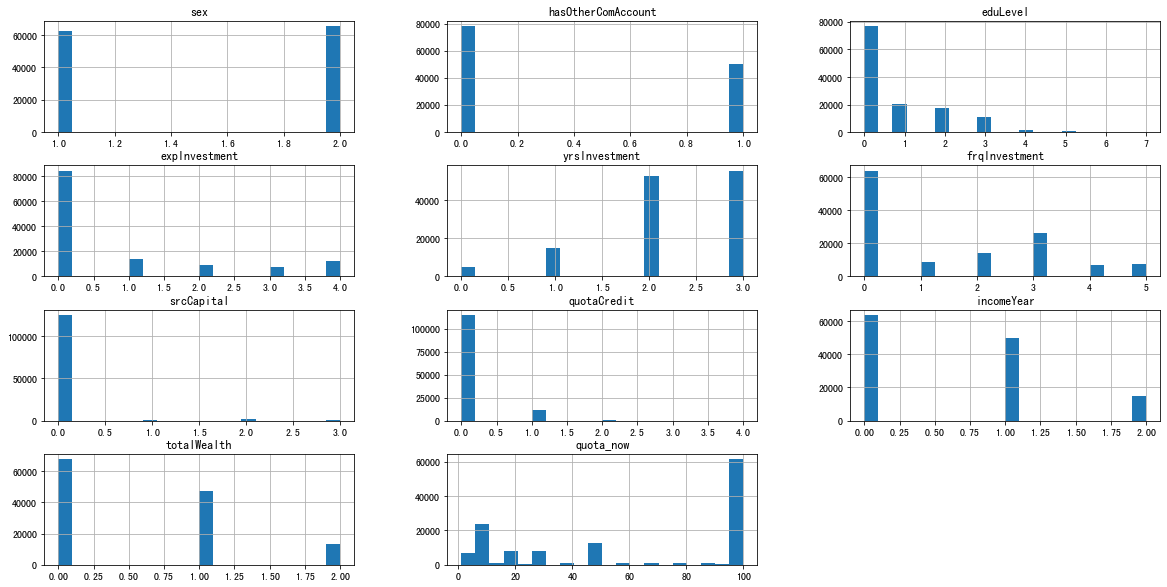

In [133]:
fig, ax = plt.subplots(figsize=(20, 10))
data.hist(ax=ax, bins=20)
plt.show()
plt.close()

## 產業 v.s. 開戶

In [134]:
pd.pivot_table(data=data, index="occupation", columns="source", values="quota_now", aggfunc=['count', 'mean', 'std'])

count              mean                   std           
source      FUGLE     玉證      FUGLE         玉證      FUGLE         玉證
occupation                                                          
不動產仲介／代銷商     127    210  95.275591  52.528571  18.347474  36.276208
不動產／租賃        401    628  96.820449  49.208599  13.739275  35.567033
休閒服務         2321   2803  96.320121  35.724224  14.765161  32.558660
八大特種行業         34     59  89.382353  25.203390  26.837349  23.100067
公務人員         2797   2434  96.764748  46.359080  12.963871  34.905581
公證人或記帳士        63     82  88.190476  39.353659  29.735315  34.983372
其他／家管        6083   7601  49.031235  40.946586  42.879215  34.323496
博弈業（網路／實體）     27     48  72.962963  30.437500  40.174122  29.294474
國防工業           61     51  94.016393  33.411765  20.017069  29.977442
大宗物資貿易商        30     27  90.000000  51.111111  26.652295  36.083592
媒體文教         1684   1338  96.730998  43.572496  13.358780  35.260856
學校教師（含行政人員）  2612   2885  96.625574  46.010745  14.361394  36.023324
學生           5603   4569  25.061574  23.910921  32.112713  28.921268
宗教、慈善、基金會     375    325  85.909333  38.963077  30.965692  34.065820
實體或虛擬貨幣兌換所      7     10  74.285714  30.900000  43.915503  22.442272
律師／會計師／地政士    535    453  94.084112  47.626932  20.414030  37.082483
批發／零售／貿易商    5644   6904  96.478207  42.938297  14.153261  35.761673
投資或稅務顧問公司      78     61  93.538462  56.508197  21.341194  37.255703
投資／自營商        384    538  91.083333  53.546468  24.619577  35.767752
旅宿／餐飲        3222   4049  95.940099  33.598666  15.600307  32.102436
水電燃氣業         470    541  96.268085  38.896488  14.628463  32.463033
營造／礦砂業       1571   1830  95.981540  41.445355  14.905444  33.715239
當鋪              4     11  95.000000  28.909091  10.000000  12.283766
自由業          1216   2526  60.814145  39.564925  43.290387  34.229886
藝術品或古董買賣商      23     28  81.782609  40.571429  36.286682  30.899393
製造業          9210  11395  96.297394  39.886792  14.102823  33.639421
資訊科技         6855   4585  96.682567  47.168811  13.202687  35.922496
軍／警／消        1578   1739  95.449303  37.457159  15.919033  32.620914
農／林／漁／牧       294    432  95.397959  50.453704  17.124363  36.429861
運輸倉儲         1396   1690  95.996418  37.867456  15.099692  33.053362
醫藥服務         4309   4744  96.156649  44.912521  14.672795  36.702698
金融保險         1944   2337  96.234053  48.424904  13.668348  35.501863
銀樓、珠寶商         22     48  90.681818  43.875000  27.268308  38.087595

## 相關性分析

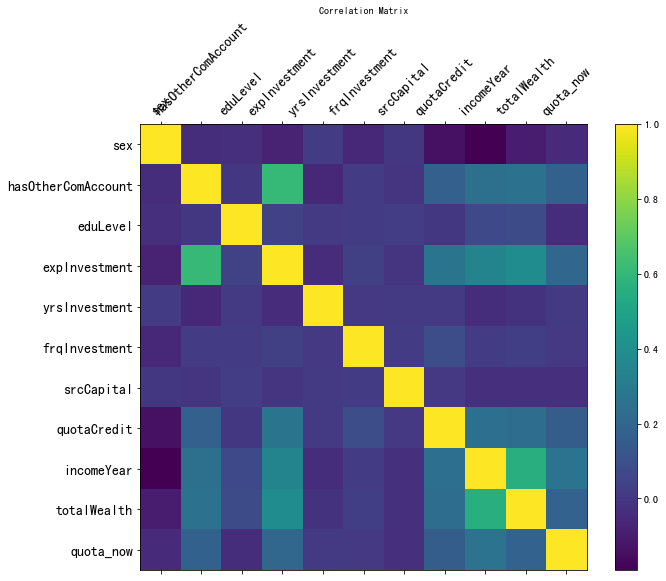

In [135]:
# pearson coefficient
corr = data.corr('pearson')
f = plt.figure(figsize=(10, 8))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10)
plt.show()
plt.close()

# sns.heatmap(data.corr())
# plt.show()

## 各欄位 v.s. quota_now

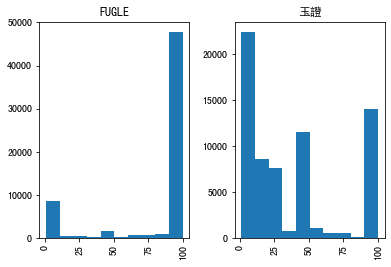

In [136]:
data.hist(column='quota_now', by='source')
plt.show()
plt.close()

/Users/jack/miniconda3/envs/datasci/lib/python3.9/site-packages/pandas/plotting/_matplotlib/hist.py:412: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  axes = _grouped_hist(


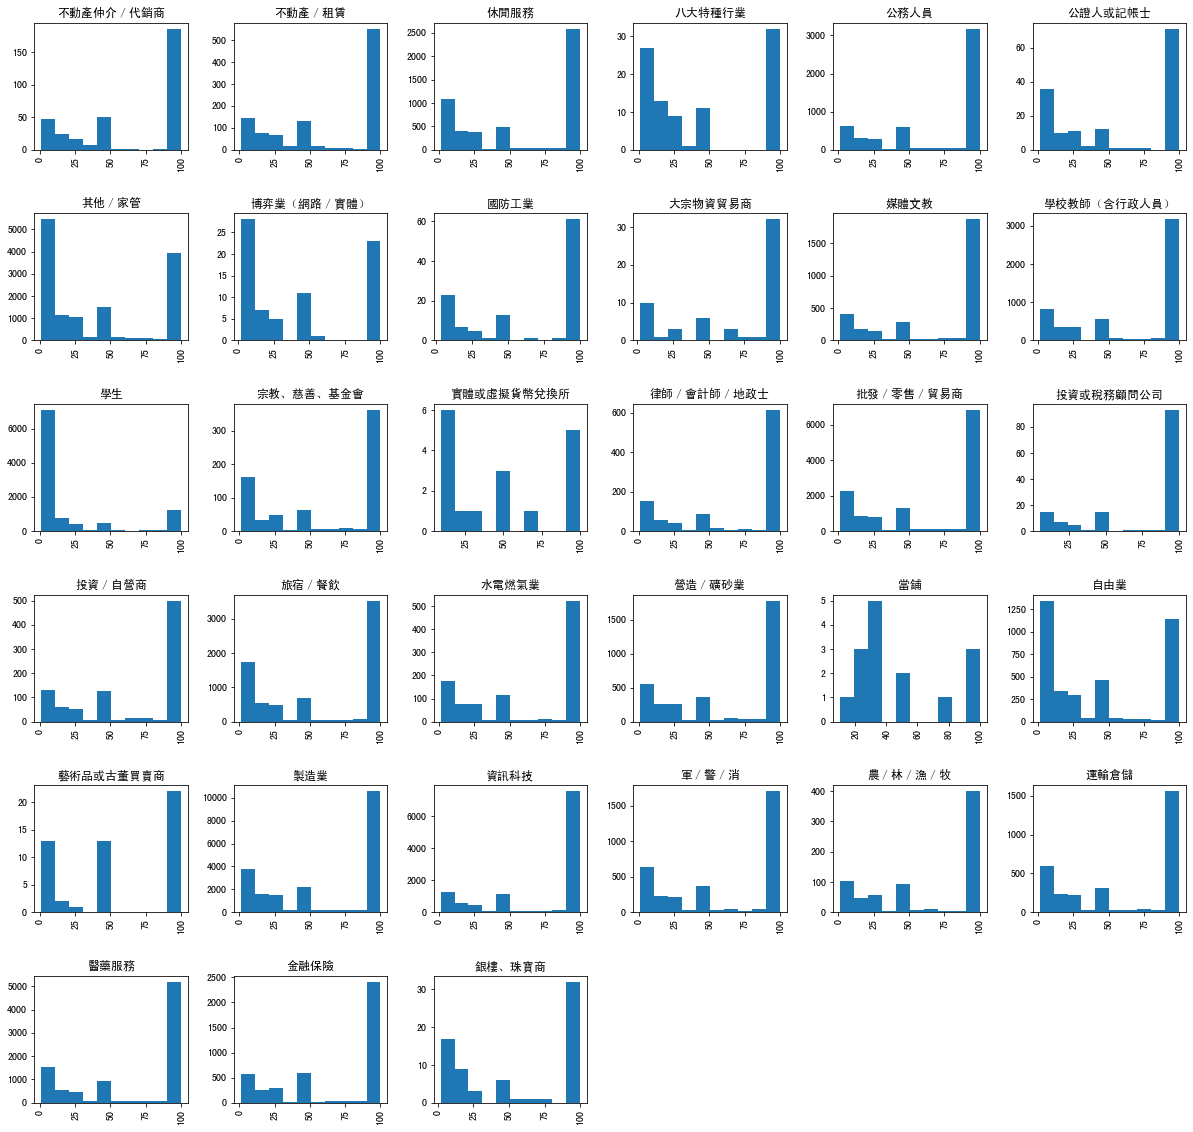

In [137]:
fig, ax = plt.subplots(figsize=(20, 20))
data.hist(column='quota_now', by='occupation', ax=ax)
plt.show()
plt.close()

# 分析credit

In [138]:
names = [
    '身分證號',
    '分公司代碼',
    '違約',
    '普通戶開戶數',
    '信用戶開戶數',
    '疑似洗錢註記',
    '融資總餘額-萬元',
    '融券總餘額-萬元',
    '單日買賣最高額度-萬',
    '期貨市場開戶數',
    '借貸款項契約數',
    '現股當沖開戶數']
credit = pd.read_csv('./data/credit.csv', names=names, skiprows=1)
# credit = pd.read_csv('./data/credit.csv')
credit

,,身分證號,分公司代碼,違約,普通戶開戶數,信用戶開戶數,疑似洗錢註記,融資總餘額-萬元,融券總餘額-萬元,單日買賣最高額度-萬,期貨市場開戶數,借貸款項契約數,現股當沖開戶數
140289368C,884AZ,2021-12-14,20211214,N,1,0,0,0,0,N,0,0,0
190354142C,884Z,2022-01-18,20220118,N,0,0,0,0,0,N,0,0,0
170393481C,884Y,2021-12-03,20211203,N,1,0,0,0,200,N,0,1,1
170431289C,884W,2021-09-09,20210909,N,0,0,0,0,0,N,0,0,0
142005435C,884AZ,2022-01-20,20220120,N,0,0,0,0,0,N,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202050304A,884X,2021-09-02,20210902,N,1,0,0,0,300,N,0,0,0
242050504A,884AZ,2021-04-21,20210420,N,3,0,0,0,1048,N,0,0,1
160003957A,884AZ,2021-06-08,20210607,N,1,0,0,0,100,N,0,0,1
120015869A,884AZ,2021-04-09,20210408,N,0,0,0,0,0,N,0,0,0


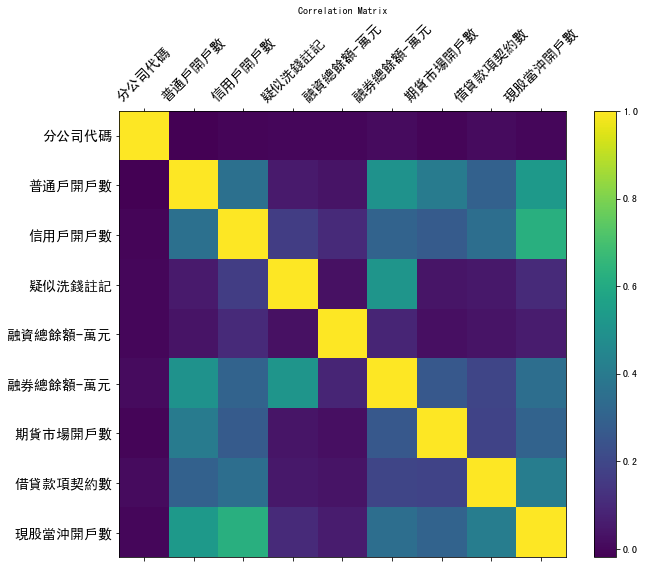

In [139]:
# pearson coefficient
corr = credit.corr('pearson')
f = plt.figure(figsize=(10, 8))
plt.matshow(credit.corr(), fignum=f.number)
plt.xticks(range(credit.select_dtypes(['number']).shape[1]), credit.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(credit.select_dtypes(['number']).shape[1]), credit.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10)
plt.show()
plt.close()

# sns.heatmap(data.corr())
# plt.show()

#  資料預處理

In [186]:
fugle = data[data['source']=='FUGLE']
yushan = data[data['source']=='玉證']
fugle = fugle.drop('source', axis=1)
yushan = yushan.drop('source', axis=1)
fugle = fugle.drop('occupation', axis=1)
yushan = yushan.drop('occupation', axis=1)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# ---------------------------------------------------------------------------- #
#                                     fugle                                    #
# ---------------------------------------------------------------------------- #

X_fugle = fugle.iloc[:, :-1].values
Y_fugle = fugle.iloc[:, -1].values

# apply SelectKBest class to extract top 10 best features
top_k = 10
bestfeatures = SelectKBest(score_func=chi2, k=top_k)
fit = bestfeatures.fit(X_fugle, Y_fugle)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(fugle.columns)
# concat two dataframes for better visualization 
featureScores = pd.concat([df_columns, df_scores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(top_k, 'Score'))  # print 10 best feature
print('-'*80)
fugle_feature_list = featureScores.nlargest(3, 'Score')['Specs'].values

# ---------------------------------------------------------------------------- #
#                                    yushan                                    #
# ---------------------------------------------------------------------------- #

X_yushan = yushan.iloc[:, :-1].values
Y_yushan = yushan.iloc[:, -1].values

# apply SelectKBest class to extract top 10 best features
top_k = 10
bestfeatures = SelectKBest(score_func=chi2, k=top_k)
fit = bestfeatures.fit(X_yushan, Y_yushan)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(yushan.columns)
# concat two dataframes for better visualization 
featureScores = pd.concat([df_columns, df_scores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(top_k, 'Score'))  # print 10 best feature
print('-'*80)
yushan_feature_list = featureScores.nlargest(5, 'Score')['Specs'].values

print(f'fugle = {fugle_feature_list}')
print(f'yushan = {yushan_feature_list}')

fugle = fugle[fugle_feature_list]
yushan = yushan[yushan_feature_list]

                Specs        Score
8          incomeYear  3330.427688
3       expInvestment  1689.443531
9         totalWealth  1525.649625
7         quotaCredit   456.234921
1  hasOtherComAccount   430.395216
5       frqInvestment   327.739674
6          srcCapital   310.681604
2            eduLevel   251.428842
0                 sex    34.095870
4       yrsInvestment    26.228563
--------------------------------------------------------------------------------
                Specs         Score
3       expInvestment  17317.015830
8          incomeYear   7622.290253
9         totalWealth   7029.716541
7         quotaCredit   3984.570176
1  hasOtherComAccount   3054.759752
5       frqInvestment    659.631897
2            eduLevel    646.832056
6          srcCapital    240.951411
0                 sex    115.363648
4       yrsInvestment     29.266284
--------------------------------------------------------------------------------
fugle = ['incomeYear' 'expInvestment' 'totalWealth']
yush

In [158]:
from sklearn.model_selection import train_test_split
X_train_fugle, X_valid_fugle, Y_train_fugle, Y_valid_fugle = train_test_split(X_fugle, Y_fugle, test_size=0.33)
X_train_yushan, X_valid_yushan, Y_train_yushan, Y_valid_yushan = train_test_split(X_yushan, Y_yushan, test_size=0.33)

# Linear Regression

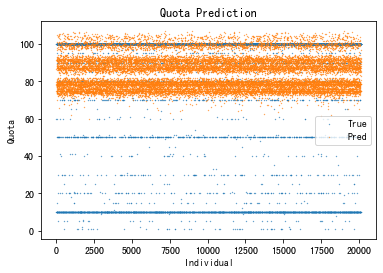

0.223239186592134

In [199]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_fugle, Y_train_fugle)
Y_pred_fugle = model.predict(X_valid_fugle)
plt.scatter(range(len(Y_pred_fugle)), Y_valid_fugle, s=0.1, label='True')
plt.scatter(range(len(Y_pred_fugle)), Y_pred_fugle, s=0.1, label='Pred')
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
plt.legend()
plt.show()
plt.close()

Y_diff_fugle = Y_pred_fugle - Y_valid_fugle
np.linalg.norm(Y_diff_fugle) / len(Y_diff_fugle)

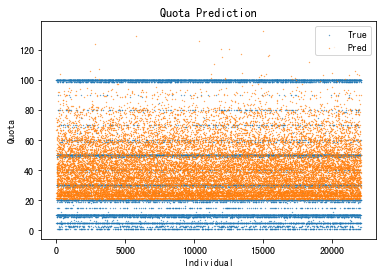

0.20544774848402203

In [200]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_yushan, Y_train_yushan)
Y_pred_yushan = model.predict(X_valid_yushan)
plt.scatter(range(len(Y_pred_yushan)), Y_valid_yushan, s=0.1, label='True')
plt.scatter(range(len(Y_pred_yushan)), Y_pred_yushan, s=0.1, label='Pred')
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
plt.legend()
plt.show()
plt.close()

Y_diff_yushan = Y_pred_yushan - Y_valid_yushan
np.linalg.norm(Y_diff_yushan) / len(Y_diff_yushan)

# Random Foreset

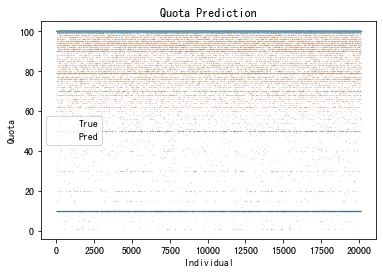

/Users/jack/miniconda3/envs/datasci/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


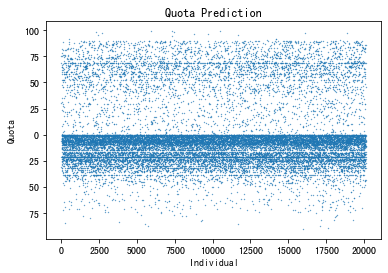

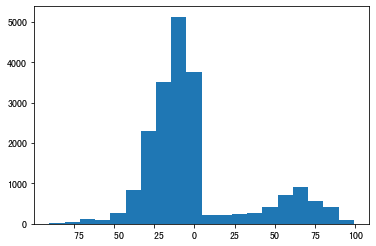

0.22906567093256455

In [201]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train_fugle, Y_train_fugle)
Y_pred_fugle = model.predict(X_valid_fugle).astype(int)

plt.scatter(range(len(Y_pred_fugle)), Y_valid_fugle, s=0.01, label='True')
plt.scatter(range(len(Y_pred_fugle)), Y_pred_fugle, s=0.01, label='Pred')
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
plt.legend()
plt.show()
plt.close()

Y_diff_fugle = Y_pred_fugle - Y_valid_fugle
plt.scatter(range(len(Y_diff_fugle)), Y_diff_fugle, s=0.1)
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
# plt.legend()
plt.show()
plt.close()

plt.hist(Y_diff_fugle, bins=20)
plt.show()
plt.close()

np.linalg.norm(Y_diff_fugle) / len(Y_diff_fugle)

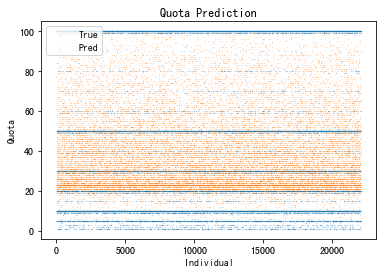

/Users/jack/miniconda3/envs/datasci/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


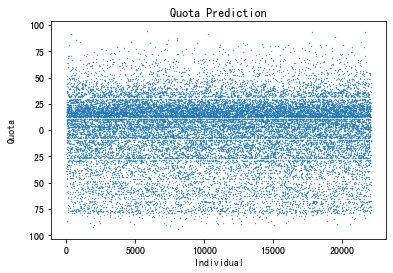

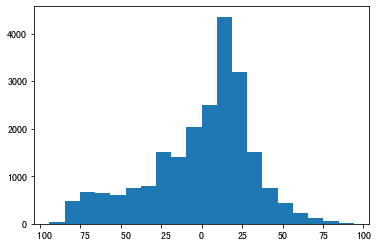

0.2148992494690477

In [202]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train_yushan, Y_train_yushan)
Y_pred_yushan = model.predict(X_valid_yushan).astype(int)

plt.scatter(range(len(Y_pred_yushan)), Y_valid_yushan, s=0.01, label='True')
plt.scatter(range(len(Y_pred_yushan)), Y_pred_yushan, s=0.01, label='Pred')
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
plt.legend()
plt.show()
plt.close()

Y_diff_yushan = Y_pred_yushan - Y_valid_yushan
plt.scatter(range(len(Y_diff_yushan)), Y_diff_yushan, s=0.1)
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
# plt.legend()
plt.show()
plt.close()

plt.hist(Y_diff_yushan, bins=20)
plt.show()
plt.close()

np.linalg.norm(Y_diff_yushan) / len(Y_diff_yushan)